In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot
import seaborn as sns

In [7]:
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# 전처리 Data

In [8]:
del titanic['alive']
del titanic['embarked']
del titanic['class']

In [9]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,man,True,NaN,Southampton,True
887,1,1,female,19.0,0,0,30.0000,woman,False,B,Southampton,True
888,0,3,female,NaN,1,2,23.4500,woman,False,NaN,Southampton,False
889,1,1,male,26.0,0,0,30.0000,man,True,C,Cherbourg,True


In [10]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [11]:
titanic['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [12]:
a1 = titanic['who']
a2 = titanic['sex']

p1 = (a1=='man')
p2 = (a1=='woman')
p3 = (a1=='child')

p1 = titanic[p1]['age'].median()
p2 = titanic[p2]['age'].median()
p3 = titanic[p3]['age'].median()

In [13]:
del titanic['deck']

In [14]:
t1 = titanic[titanic['who'] == 'man']
t1 = t1['age'].fillna(p1)
t1.isna().sum()

0

In [15]:
t2 = titanic[titanic['who'] == 'woman']
t2 = t2['age'].fillna(p2)
t2.isna().sum()

0

In [16]:
t3 = titanic[titanic['who'] == 'child']
t3 = t3['age'].fillna(p3)
t3.isna().sum()

0

In [17]:
t_total = pd.concat([t1,t2,t3])
t_total = t_total.reset_index()
del t_total['index']
t_total.isna().sum()
t_total

,age
0,22.00
1,35.00
2,30.00
3,54.00
4,20.00
...,...
886,0.83
887,4.00
888,9.00
889,4.00


In [18]:
q1 = (a1=='man')
q2 = (a1=='woman')
q3 = (a1=='child')
q1 = titanic[q1]

In [19]:
q2 = titanic[q2]

In [20]:
q3 = titanic[q3]

In [21]:
q_total = pd.concat([q1,q2,q3])
del q_total['age']
q_total
tot = pd.concat([q_total,t_total],axis=1)
tot

,survived,pclass,sex,sibsp,parch,fare,who,adult_male,embark_town,alone,age
0,0,3,male,1,0,7.2500,man,True,Southampton,False,22.00
1,1,1,female,1,0,71.2833,woman,False,Cherbourg,False,35.00
2,1,3,female,0,0,7.9250,woman,False,Southampton,True,30.00
3,1,1,female,1,0,53.1000,woman,False,Southampton,False,54.00
4,0,3,male,0,0,8.0500,man,True,Southampton,True,20.00
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,man,True,Southampton,True,0.83
887,1,1,female,0,0,30.0000,woman,False,Southampton,True,4.00
888,0,3,female,1,2,23.4500,woman,False,Southampton,False,9.00
889,1,1,male,0,0,30.0000,man,True,Cherbourg,True,4.00


In [22]:
tot['embark_town'] = tot['embark_town'].fillna('unknown')
tot.isna().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
who            0
adult_male     0
embark_town    0
alone          0
age            0
dtype: int64

# Data 시각화

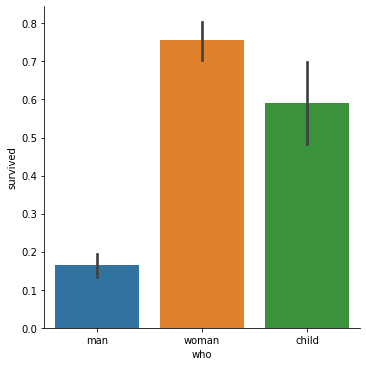

In [23]:
# 남성, 여성, 어린이 별 생존율

sns.catplot(x='who', y='survived', data=tot, kind='bar');

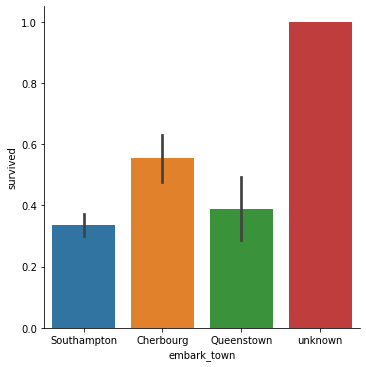

In [24]:
# 출발 도시별 생존율

sns.catplot(x='embark_town', y='survived', data=tot, kind='bar');

In [25]:
tot['age'].describe()

count    891.000000
mean      29.758889
std       13.002570
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [27]:
tot['Age_cut2'] = 0
tot['Age_cut2'] = pd.cut(tot.age, bins=[0,29,31,45,80], labels=['A', 'B', 'C', 'D'])


# 구분 별 시각화하여 개수 확인하기
tot.Age_cut2.value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_cut2
A,384
B,221
C,183
D,103


In [28]:
tot['age'].describe()

count    891.000000
mean      29.758889
std       13.002570
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

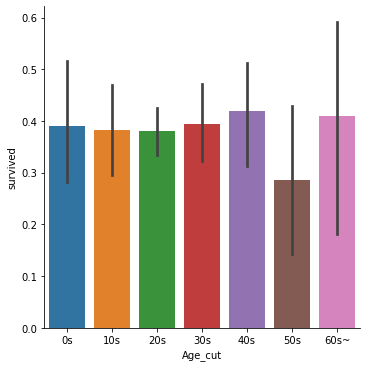

In [29]:
# 나이대별 생존율

sns.catplot(x='Age_cut', y='survived', data=tot, kind='bar');

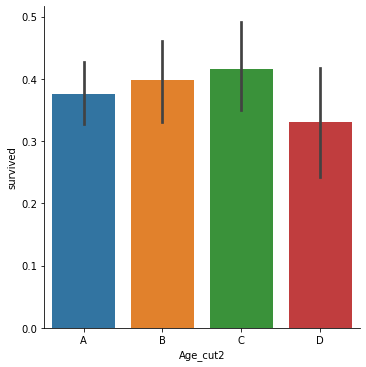

In [30]:
# 나이대별 생존율_2

sns.catplot(x='Age_cut2', y='survived', data=tot, kind='bar');

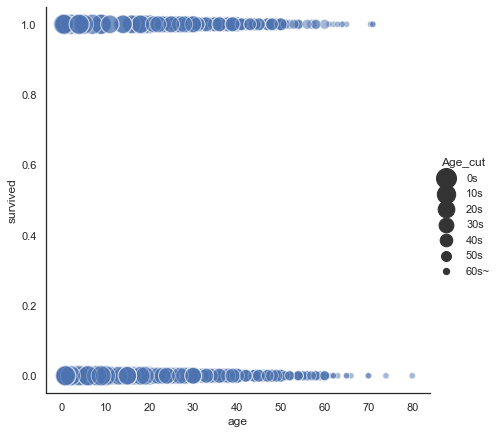

In [31]:
# 총알의 궤적
# 그래프 별 범주형, 연속형 자료 사용에 대한 이해의 중요성
import seaborn as sns
sns.set_theme(style="white")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="age", y="survived",size="Age_cut",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=tot);

In [32]:
tot_0 = tot[tot['survived'] == 0]
tot_1 = tot[tot['survived'] == 1]
tot_0

,survived,pclass,sex,sibsp,parch,fare,who,adult_male,embark_town,alone,age,Age_cut,Age_cut2
0,0,3,male,1,0,7.2500,man,True,Southampton,False,22.00,20s,A
4,0,3,male,0,0,8.0500,man,True,Southampton,True,20.00,10s,A
5,0,3,male,0,0,8.4583,man,True,Queenstown,True,39.00,30s,C
6,0,1,male,0,0,51.8625,man,True,Southampton,True,30.00,20s,B
7,0,3,male,3,1,21.0750,child,False,Southampton,False,35.00,30s,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,0,0,7.0500,man,True,Southampton,True,1.00,0s,A
885,0,3,female,0,5,29.1250,woman,False,Queenstown,False,15.00,10s,A
886,0,2,male,0,0,13.0000,man,True,Southampton,True,0.83,0s,A
888,0,3,female,1,2,23.4500,woman,False,Southampton,False,9.00,0s,A


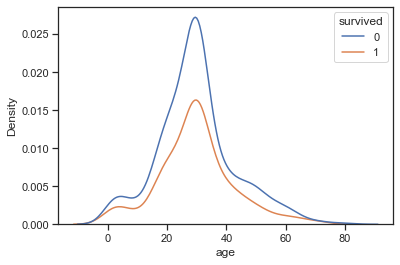

In [33]:
# 나이대별 생존자/사망자 분포

sns.set_style(style='ticks')
sns.kdeplot(data=tot, x="age", hue="survived");

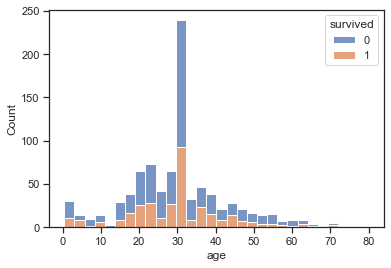

In [34]:
# 나이대별 생존자/사망자 count

sns.histplot(data=tot, x="age", hue="survived", multiple="stack");

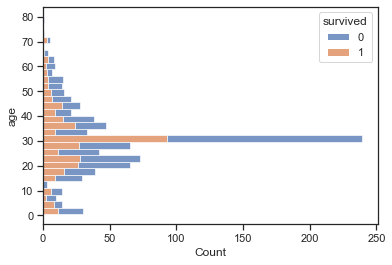

In [40]:
# 나이대별 생존자/사망자 count - feedback

sns.histplot(data=tot, y="age", hue="survived", multiple="stack");

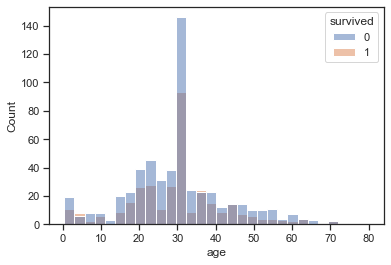

In [37]:
# 나이대별 생존자/사망자 count 대소비교 - new

sns.histplot(data=tot, x="age", hue="survived");

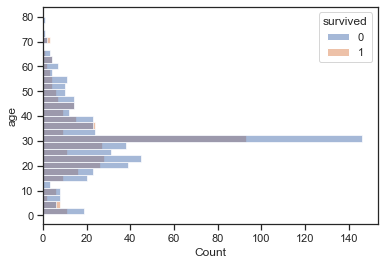

In [41]:
# 나이대별 생존자/사망자 count 대소비교 - feedback

sns.histplot(data=tot, y="age", hue="survived");

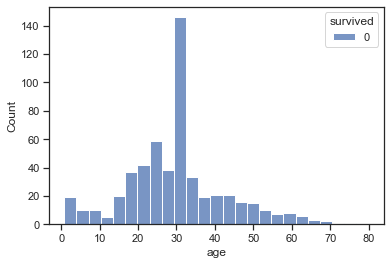

In [35]:
# 나이대별 사망자 수

sns.histplot(data=tot_0, x="age", hue="survived", multiple="stack");

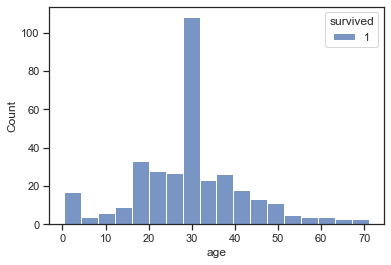

In [36]:
# 나이대별 생존자 수

sns.histplot(data=tot_1, x="age", hue="survived", multiple="stack");

## 전처리 연습용 Data

In [34]:
p2 = titanic['pclass']==2
p2 = titanic[p2]
p2

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
9,1,2,female,14.0,1,0,30.0708,child,False,Cherbourg,False
15,1,2,female,55.0,0,0,16.0000,woman,False,Southampton,True
17,1,2,male,NaN,0,0,13.0000,man,True,Southampton,True
20,0,2,male,35.0,0,0,26.0000,man,True,Southampton,True
21,1,2,male,34.0,0,0,13.0000,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...
866,1,2,female,27.0,1,0,13.8583,woman,False,Cherbourg,False
874,1,2,female,28.0,1,0,24.0000,woman,False,Cherbourg,False
880,1,2,female,25.0,0,1,26.0000,woman,False,Southampton,False
883,0,2,male,28.0,0,0,10.5000,man,True,Southampton,True


In [35]:
p3 = titanic['pclass']==3
p3 = titanic[p3]
p3

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True
5,0,3,male,NaN,0,0,8.4583,man,True,Queenstown,True
7,0,3,male,2.0,3,1,21.0750,child,False,Southampton,False
...,...,...,...,...,...,...,...,...,...,...,...
882,0,3,female,22.0,0,0,10.5167,woman,False,Southampton,True
884,0,3,male,25.0,0,0,7.0500,man,True,Southampton,True
885,0,3,female,39.0,0,5,29.1250,woman,False,Queenstown,False
888,0,3,female,NaN,1,2,23.4500,woman,False,Southampton,False


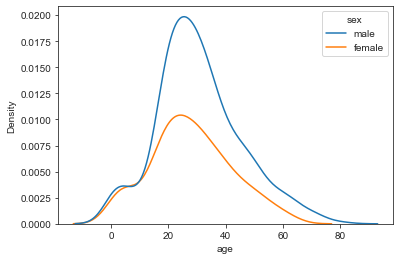

In [42]:
sns.set_style(style='ticks')
sns.kdeplot(data=titanic, x="age", hue="sex");